In [44]:

import numpy as np
from os import path
import time
import copy


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from scipy.stats import zscore

In [45]:
#FACTOR
Dir='VarianceMaps/'

Feat=pd.read_csv(Dir+'CCy.csv')
Cat=pd.read_csv('C:/Users/Rashmi/WorkingLibs/idgan-master_Jan/outputs/TraversalLoop/BGL.csv')

Feat=Feat.loc[(Feat!=0).any(axis=1)]

sns.set(font_scale = 5)
#hierarchical Clustering


In [46]:
normed_matrix = zscore(Feat)
normalized_df= pd.DataFrame(normed_matrix, columns=Feat.columns)
normalized_df=normalized_df.dropna(1)


C:\Users\Kevin Tsia\AppData\Local\Temp\ipykernel_11736\3086402915.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  normalized_df=normalized_df.dropna(1)


In [47]:
sns.set(font_scale = 1 )
from scipy.stats import zscore
#C_10dim=pd.DataFrame(cdim_gan)
#normed_matrix = zscore(Feat)
plt.figure(figsize=(10,10))


df_z_scaled = Feat.copy()
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / (df_z_scaled[column].std())    
normalized_df= pd.DataFrame(df_z_scaled, columns=Feat.columns)
normalized_df=normalized_df.dropna(1)

C:\Users\Kevin Tsia\AppData\Local\Temp\ipykernel_11736\3325497796.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  normalized_df=normalized_df.dropna(1)


<Figure size 720x720 with 0 Axes>

C:\Users\Kevin Tsia\AppData\Local\Temp\ipykernel_11736\3072841073.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  normalized_df=normalized_df.dropna(1)


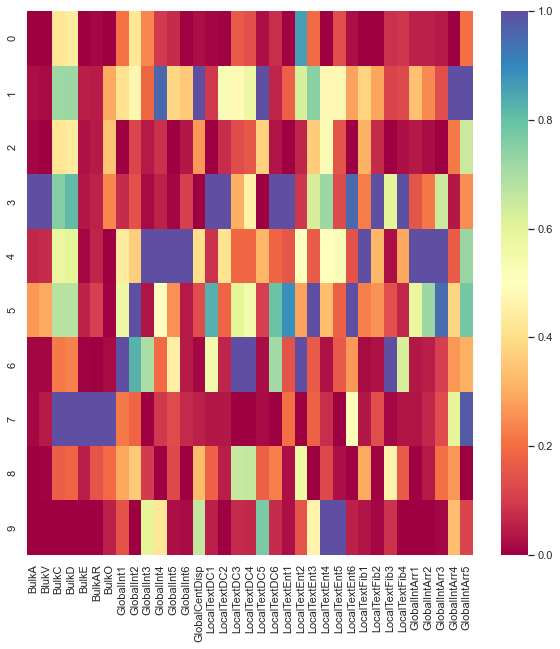

In [48]:
sns.set(font_scale = 1 )
from scipy.stats import zscore
#C_10dim=pd.DataFrame(cdim_gan)
#normed_matrix = zscore(Feat)
plt.figure(figsize=(10,10))

# copy the data
df_min_max_scaled = Feat.copy()
  
# apply Row Scaling technique
for column in Feat.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
sns.heatmap(df_min_max_scaled, cmap='Spectral')
normalized_df= pd.DataFrame(df_min_max_scaled, columns=Feat.columns)
normalized_df=normalized_df.dropna(1)


In [49]:

xs = np.arange(0, 10)
ys = np.arange(0, 3)
colors = ["red", "purple", "green"]


In [37]:
Attr1=['BulkA', 'BlukV', 'BulkC', 'BulkD', 'BulkE', 'BulkO', 'BulkAR'] 
#Attr1=[]
Attr2=['GlobalInt1','GlobalInt2', 'GlobalInt3','GlobalInt4', 'GlobalInt5','GlobalInt6',
       
       'GlobalCentDisp', 'GlobalIntArr1', 'GlobalIntArr2', 'GlobalIntArr3', 'GlobalIntArr4','GlobalIntArr5']
Attr3=[#'LocalTextFit1','LocalTextFit2', 'LocalTextFit3', 'LocalTextFit4',
     'LocalTextDC1', 'LocalTextDC2', 'LocalTextDC3',
      'LocalTextDC4', 'LocalTextDC5', 'LocalTextDC6', 'LocalTextEnt1', 'LocalTextEnt2', 'LocalTextEnt3', 'LocalTextEnt4',
      'LocalTextEnt5', 'LocalTextEnt6', 'LocalTextFib1', 'LocalTextFib2', 'LocalTextFib3', 'LocalTextEnt4']
import array
Attr=[Attr1, Attr2, Attr3]


In [38]:
ColorCat=[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
#ColorCat=['Bulk', 'Bulk', 'Bulk', 'Bulk', 'Bulk', 'Bulk', 'Bulk', 'Global', 'Global',  'Global',  'Global',  'Global',  'Global',  'Global',  'Global',  'Global',  'Global',  'Global',  'Global', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local']

Features=['BulkA', 'BlukV', 'BulkC', 'BulkD', 'BulkE', 'BulkO', 'BulkAR','GlobalInt1','GlobalInt2', 'GlobalInt3','GlobalInt4', 'GlobalInt5','GlobalInt6',
       'GlobalCentDisp', 'GlobalIntArr1', 'GlobalIntArr2', 'GlobalIntArr3', 'GlobalIntArr4','GlobalIntArr5','LocalTextDC1', 'LocalTextDC2', 'LocalTextDC3',
      'LocalTextDC4', 'LocalTextDC5', 'LocalTextDC6', 'LocalTextEnt1', 'LocalTextEnt2', 'LocalTextEnt3', 'LocalTextEnt4',
      'LocalTextEnt5', 'LocalTextEnt6', 'LocalTextFib1', 'LocalTextFib2', 'LocalTextFib3', 'LocalTextFib4']
ColorCat=np.array(ColorCat)
Features=pd.Series(Features)
FeatList=list(Features)

#Species=pd.DataFrame(Species)
cat = dict(zip(np.unique(ColorCat), ["red", "purple", "green"]))
col_colors = pd.Series(ColorCat).map(cat)

In [39]:
ColorCat1=pd.DataFrame(ColorCat, columns=['Category'])
ColorCat2=pd.DataFrame(ColorCat, columns=['Category'])
sp = ColorCat1.pop("Category")

#ColorCat2=ColorCat2.transpose()

<Figure size 3600x3600 with 0 Axes>

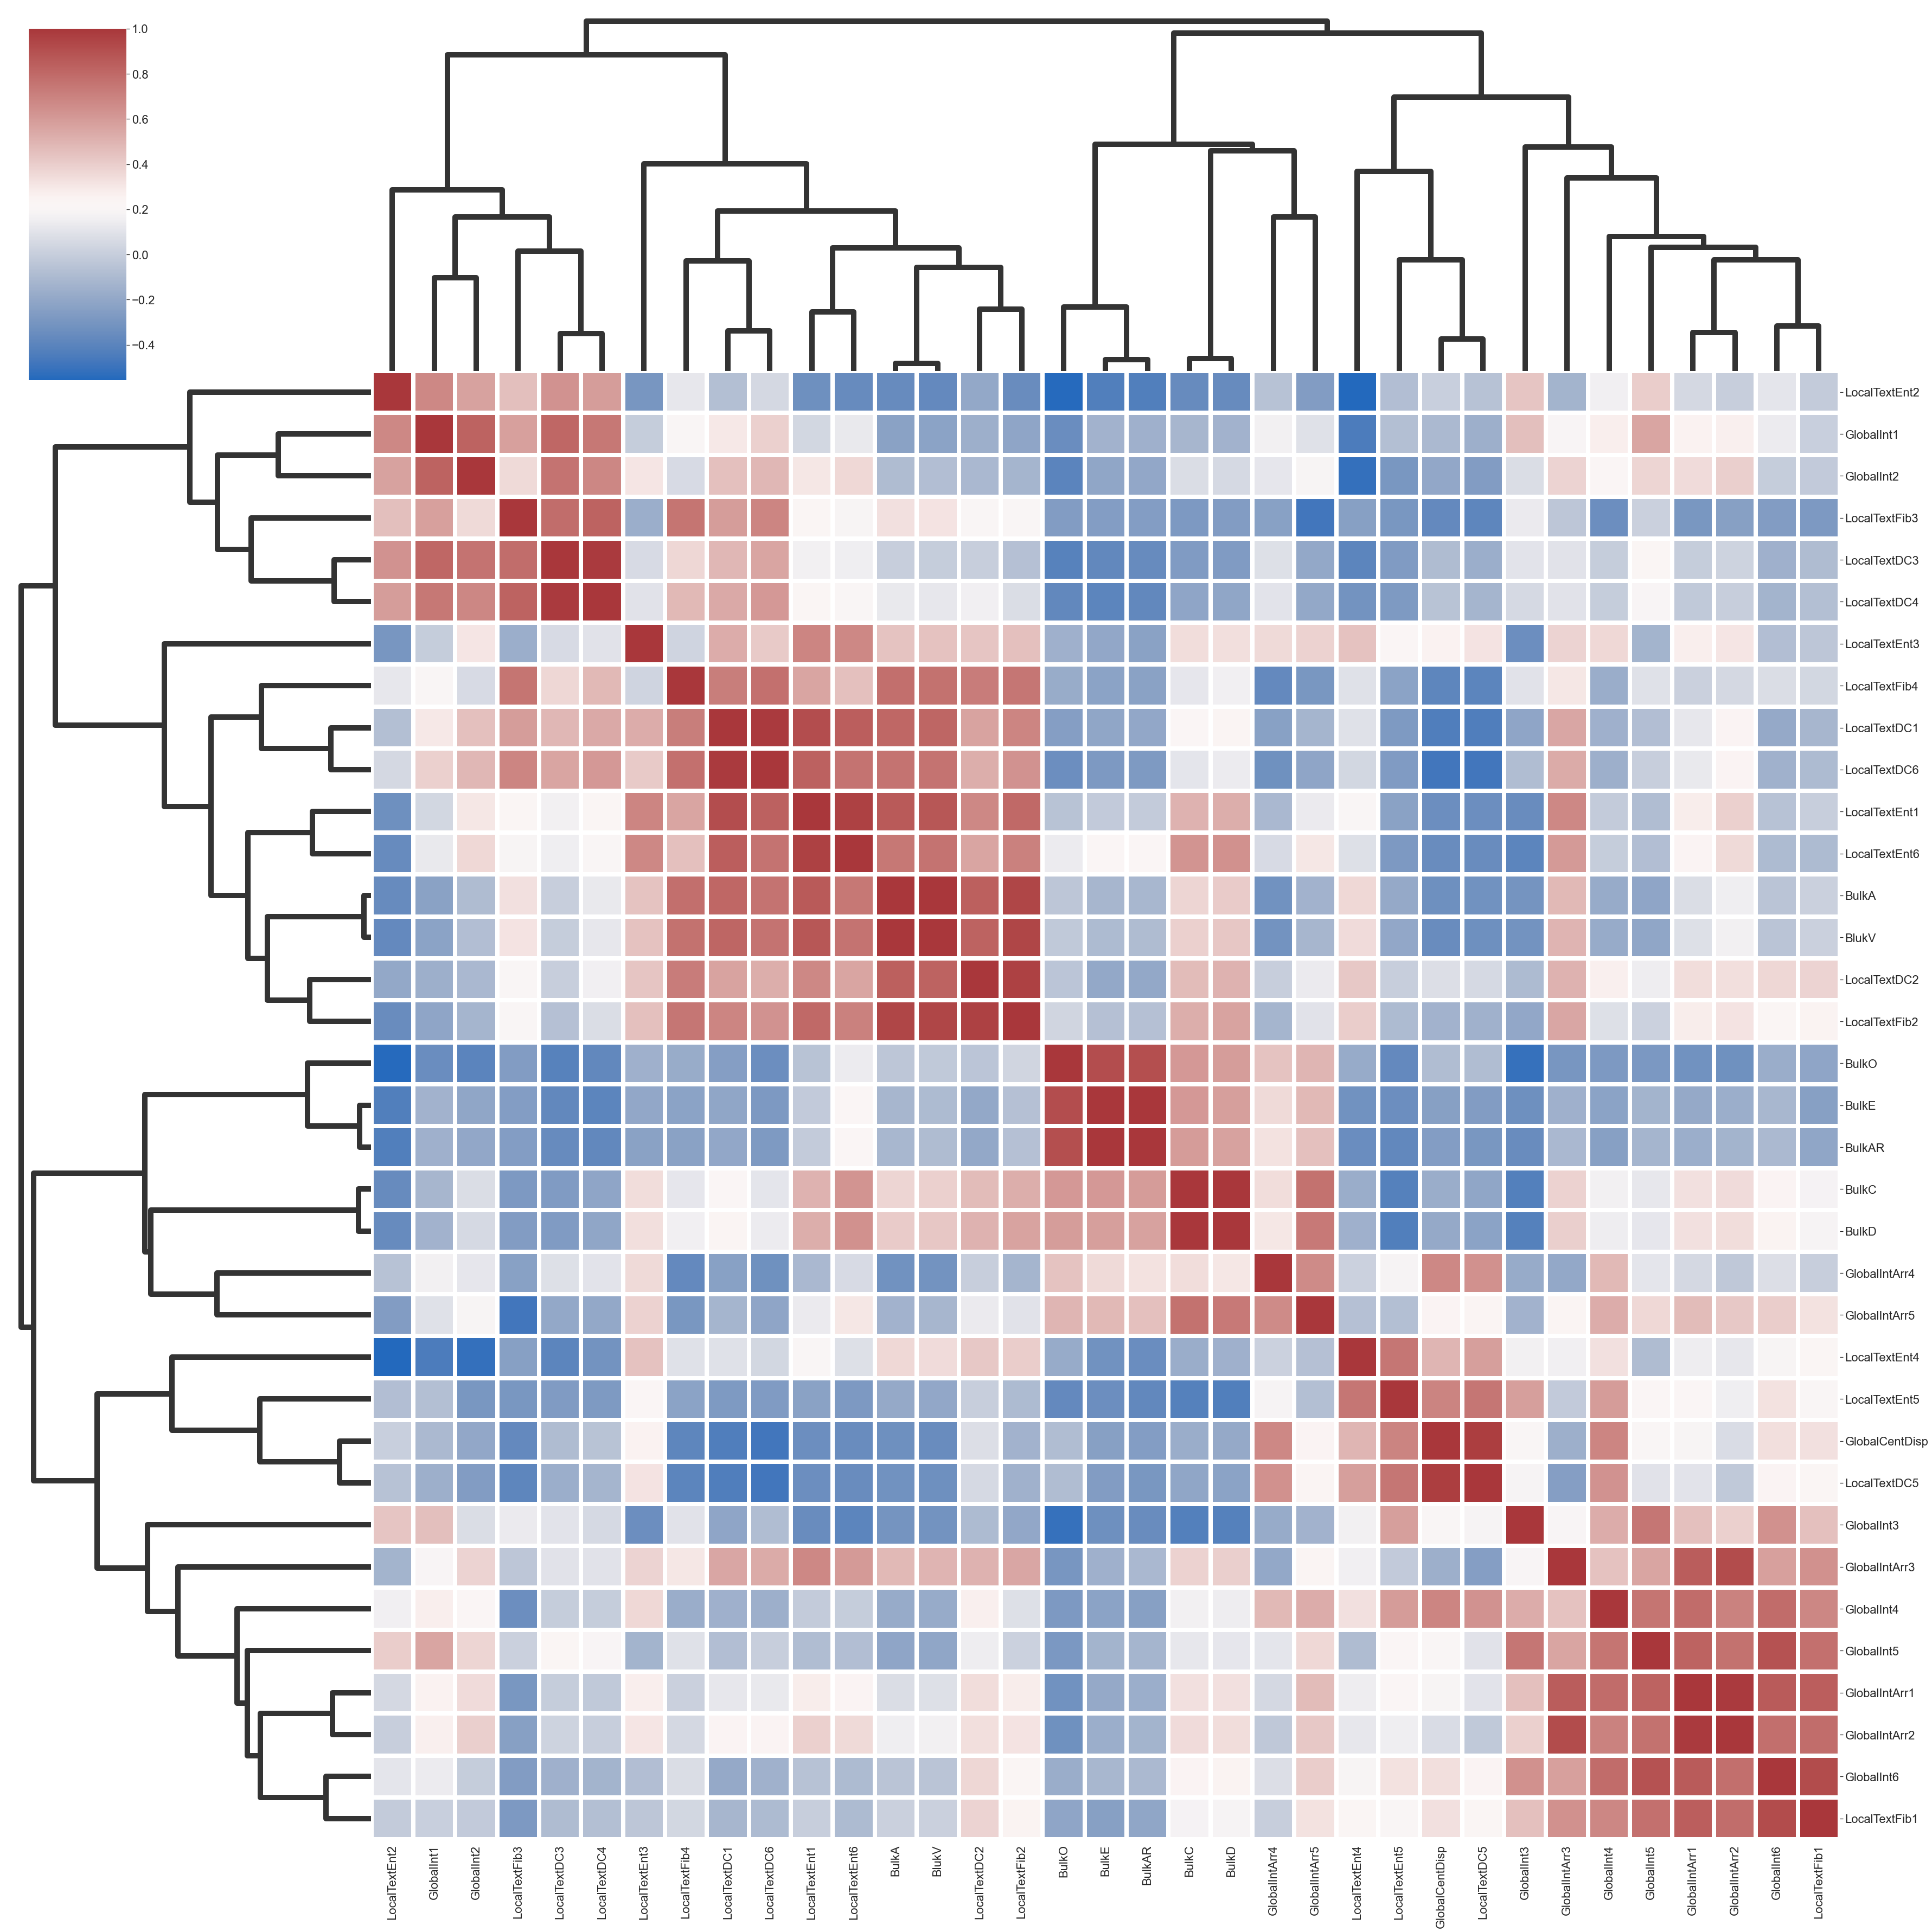

In [40]:

CorrMat=normalized_df.corr(method ='pearson')

#corrmat=normed_matrix.corr(method ='pearson')

sns.set(font_scale = 2 )
plt.figure(figsize=(50,50))
g=sns.clustermap(CorrMat, figsize=(50,50),xticklabels=Feat.columns,linewidths=8,tree_kws=dict(linewidths=10),cmap="vlag")
#g=sns.clustermap(normalized_df, figsize=(120,120),xticklabels=Feat.columns,linewidths=8,tree_kws=dict(linewidths=10))

In [41]:
sns.set(font_scale = 24)
# First Remove non useful rows
col_colors = sp.map(cat)
#g1 = sns.clustermap(normalized_df, col_colors=col_colors)
 
g1=sns.clustermap(normalized_df, figsize=(150,150),xticklabels=Feat.columns, fmt='d',linewidths=20,tree_kws=dict(linewidths=30), cmap="YlGnBu")
for tick_label in g1.ax_heatmap.axes.get_xticklabels():
    tick_text = tick_label.get_text()
    FeatInd = FeatList.index(tick_text)
    tick_label.set_color(col_colors[FeatInd])

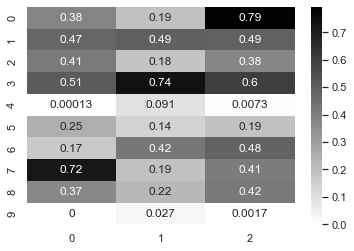

In [24]:
sns.set(font_scale = 1 )

AttrValArray=[]
AttrDim=[]
for dimN in range (0, len(normalized_df)):
    AttrValArray=[]
    MeanAttN=0
    for Attri in Attr:

        for i in range(0, len(Attri)):
            AttrVal=normalized_df.at[dimN, Attri[i]]
            MeanAttN=MeanAttN + AttrVal
        MeanAttN=MeanAttN/len(Attri)
        #if dimN==3 and Attri=='Attr2':

        AttrValArray.append(MeanAttN)
    AttrDim.append(AttrValArray)
AttrDim=np.vstack(AttrDim)    
#a = sns.heatmap(AttrDim, annot=True,row_cluster=True, col_cluster=False ,cmap='binary')
a = sns.heatmap(AttrDim, annot=True,cmap='binary')


<AxesSubplot:>

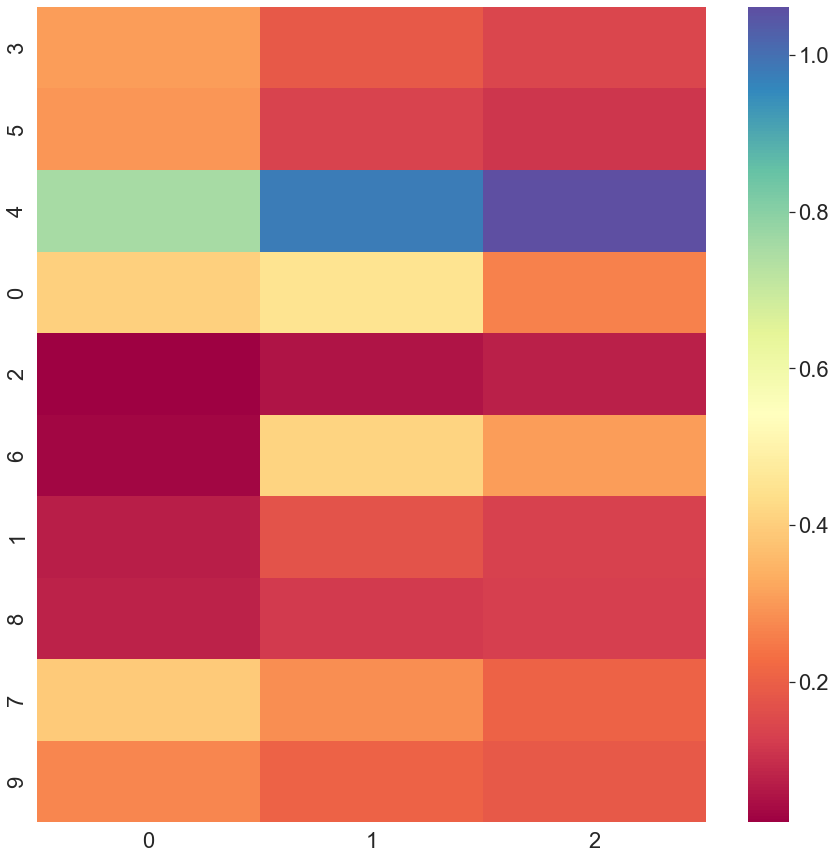

In [15]:
#rearrange=['1', '5', '7', '8', '9', '6', '0', '2', '3', '4'] #CPA3
#rearrange=["1", '5', '9', '0', '3', '8', '4', '2', '6', '7']#LiveCell
#rearrange=['3','0','8','6', '5', '4', '9', '7', '1', '2']# Lung Cancer
#rearrange=['3','5','4', '7','6','1','9','2','0','8']#CellCycle
#rearrange=['5','0','9','2','8','4','1','3','6', '7']#EMT

#New algorithm
#rearrange=['1', '8', '9', '4', '6', '0', '3', '5', '2', '7'] #CPA
#rearrange=["1", '7', '9', '4', '8', '0', '2', '3', '5', '6']#LiveCell
#rearrange=['0','3','6','5', '4', '9', '7', '2', '1', '8']# Lung Cancer
#rearrange=['5','9','0', '4','6','7','1','2','3','8']#CellCycle
#rearrange=['0','6','7','8','2','3','1','9', '4', '5']#EMT
#rearrange=['1','4','5','0','3','7','9','6', '2', '8']#CH1
#rearrange=['4','3','7','9','2','8','5','6', '0', '1']#CH3
rearrange=['3','5','4','0','2','6','1','8', '7', '9']#CH4


#i=0
# copy the data
plt.figure(figsize=(15,15))

sns.set(font_scale = 2)
NewMat=pd.DataFrame(AttrDim)
NewMat = NewMat.iloc[[3, 5, 4, 0, 2, 6, 1, 8, 7, 9], :]    
#NewMat = NewMat.reindex(columns=['3', '0', '8', '6', '5', '4', '9', '7', '1', '2'])
#NewMat=pd.DataFrame.to_numpy(NewMat)
sns.heatmap(NewMat, cmap='Spectral')

0
0
0.40608508528488363
0
1
0.45020445112500607
0
2
0.26185673071928806
1
0
0.07141573652884484
1
1
0.1737763790814234
1
2
0.13067751096105726
2
0
0.020936850887396736
2
1
0.054310673283050115
2
2
0.07483807065903063
3
0
0.3080569867052841
3
1
0.18654634492313316
3
2
0.14422404128357677
4
0
0.7548827619756907
4
1
0.9762717829034434
4
2
1.0610169864314654
5
0
0.2958909118120276
5
1
0.13524713743950928
5
2
0.11293524837480083
6
0
0.02923230112953623
6
1
0.4132504002322129
6
2
0.30762278411253746
7
0
0.3920393853775068
7
1
0.28226377512025264
7
2
0.20570168814759243
8
0
0.07859009028390802
8
1
0.11922745872727523
8
2
0.12725222203770906
9
0
0.27075772409416804
9
1
0.20553412496546145
9
2
0.18402849609759597


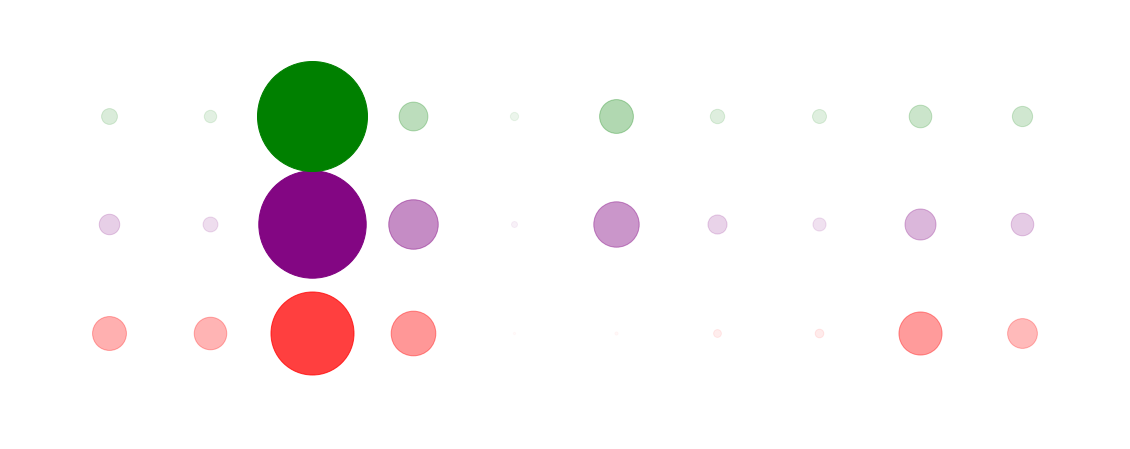

In [16]:
NewMat=np.array(NewMat)
plt.figure(figsize=(20,8))
plt.axis('off')
for x in xs:

        
    for y in ys:
        if y==0:
                square_color='red'
        elif y==1:
            square_color='purple'
        else :
            square_color='green'
        square_size  = NewMat[x,y]
        if (square_size>1):
            square_size=1
        plt.plot(x, y, linestyle="None", marker="o", alpha=square_size,
                 markersize=square_size*110, mfc=square_color, mec=square_color)
        print(x)
        print(y)
        print( AttrDim[x,y])
 

plt.grid(visible=True, axis='x')
plt.xlim(-1, 10)
plt.ylim(-1, 3)
plt.show()

In [87]:
AttrDim[0,2]

0.34619908328511445

In [166]:
maxVar1=0    
maxVar2=0
maxVar3=0
#Compute disentanglement metric from the secondary heatmap
#for i in range(0, len(Attr)):
MaxVar1=max(AttrDim[:,0])
MaxVar2=max(AttrDim[:,1])
MaxVar3=max(AttrDim[:,2])


max_ind1=AttrDim[:,0].tolist().index(MaxVar1)
max_ind2=AttrDim[:,1].tolist().index(MaxVar2)
max_ind3=AttrDim[:,2].tolist().index(MaxVar3)

if max_ind1==max_ind2==max_ind3:
    MaxVar=max(MaxVar1, MaxVar2, MaxVar3)
    Metric=MaxVar/3    
elif max_ind1==max_ind2:
    MaxVar=max(MaxVar1, MaxVar2)
    Metric=(MaxVar+MaxVar2)/3
elif max_ind2==max_ind3:
    MaxVar=max(MaxVar2, MaxVar3)
    Metric=(MaxVar+MaxVar1)/3

elif max_ind1==max_ind3:
    MaxVar=max(MaxVar1, MaxVar3)
    Metric=(MaxVar+MaxVar2)/3

else:
    Metric=(MaxVar1+MaxVar2+MaxVar3)/3

    
print('Metric=')
print(Metric) 

Metric=
0.7943216899956163


In [679]:
df_New=normalized_df

for i, row in normalized_df.iterrows():
    var=(np.var(row) )
    mean=np.mean(row)
    print(var)
    if(var < 0.5):
        if(mean < 0.4):
            df_New=df_New.drop(i)

            
sns.set(font_scale = 20 )

g2=sns.clustermap(df_New, figsize=(140,140),xticklabels=Feat.columns,linewidths=8,tree_kws=dict(linewidths=15), cmap="YlGnBu")


0.055545083285637564
0.07642922762222108
0.11614722651988639
0.13914610875134456
0.10245242603649568
0.09652622657385715
0.08901244206879767
0.060521443867704326
0.0679150755702746
0.054080498789697916


In [646]:
FeatArr= pd.DataFrame.to_numpy(df_New)
cat=Cat.values.tolist()

Dim=["'0'","'1'", "'2'", "'3'", "'4'", "'5'", "'6'", "'7'", "'8'", "'9'"]
cat=["'B'","'L'", "'G'"]

In [647]:
FeatArr.shape[0]

4

In [648]:
categ=[]
for i in range(0,len(cat)):
    categ.append(i)

In [649]:
for i in range(0,FeatArr.shape[0]):
    for j in range(0,FeatArr.shape[1]):
        print('[', end="" ) , print((Dim[i]), end="," ), print(str(cat[j][0]),end="," ), print(FeatArr[i,j], end=""), print('],')

['0',',1.0],
['0',',1.0],
['0',',0.3296358122130893],
['0',

IndexError: list index out of range

In [ ]:
cat

In [ ]:
for i in range(0,len(Dim)):
    for j in range(0,AttrDim.shape[1]):
        print('[', end="" ) , print((Dim[i]), end="," ), print(str(cat[j]),end="," ), print(AttrDim[i,j], end=""), print('],')

In [116]:
        print('[', end="" ) , print((Dim[i]), end="," ), print(str(cat[j][0]),end="," ), print(FeatArr[i,j], end=""), print('],')

['9',',

IndexError: index 9 is out of bounds for axis 0 with size 6

In [245]:
FeatArr.shape[1]

38

In [204]:
FeatArr[i,]

0.873001826

In [ ]:
cat

In [171]:
for i in cat:
     print(cat[i][0])

TypeError: list indices must be integers or slices, not list